# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import pylab as pl 

# 02. Import Data

In [2]:
# Display charts in notebook
%matplotlib inline

In [3]:
# Folder Path
path = r'C:\Users\jrper\OneDrive\Documents\Career Foundry Data Analytics Program\Achievement 6'

In [4]:
# Import trips_wrangled_no_outliers2.csv
df_trips = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'trips_wrangled_no_outliers2.csv'), index_col = False)

# 03. Explore Data

In [5]:
# View first 5 rows for df_trips
df_trips.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,weekday_stoptime,month_name_starttime,month_name_stoptime,hour_starttime,hour_stoptime,customer_age,starttime_counts,tripduration_minutes,tripduration_hours,tripduration_buckets
0,0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,...,Wednesday,January,January,0,0,36,25629,3.766667,0.062778,10 minutes or less
1,1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,...,Wednesday,January,January,0,0,31,25629,6.283333,0.104722,10 minutes or less
2,2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,...,Wednesday,January,January,0,0,31,25629,4.800000,0.080000,10 minutes or less
3,3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,...,Wednesday,January,January,0,0,51,15767,7.250000,0.120833,10 minutes or less
4,4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,...,Wednesday,January,January,0,0,37,25629,3.850000,0.064167,10 minutes or less


In [6]:
# Drop 'Unnamed: 0' column
df_trips.drop(columns = ['Unnamed: 0'], inplace = True)

In [7]:
# View df_trips rows and columns count
df_trips.shape

(379861, 32)

In [8]:
# Convert 'starttime' and 'stoptime' columns to datetime instead of object
df_trips['starttime'] = pd.to_datetime(df_trips['starttime'])
df_trips['stoptime'] = pd.to_datetime(df_trips['stoptime'])

In [9]:
# View df_trips columns datatypes
df_trips.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                             object
day_of_month_starttime              int64
month_starttime                     int64
year_starttime                      int64
day_of_month_stoptime               int64
month_stoptime                      int64
year_stoptime                       int64
weekday_starttime                  object
weekday_stoptime                   object
month_name_starttime              

In [10]:
# Create dataframe without categorical variables
df_trips_cluster = df_trips[['tripduration_minutes', 'start station latitude', 'start station longitude', 'end station latitude', 'end station longitude', 'birth year', 'customer_age', 'hour_starttime', 'hour_stoptime']]

In [11]:
# Standardize data
scaler = StandardScaler()
df_std = scaler.fit_transform(df_trips_cluster)

# 04. Elbow Technique

In [12]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_std).score(df_std) for i in range(len(kmeans))] 

score

[-3418749.0000000503,
 -2816287.4945224123,
 -2060727.4192059522,
 -1700845.9090333818,
 -1476658.16567105,
 -1324967.113836825,
 -1190601.6493126382,
 -1092663.818881134,
 -1031925.5993570101]

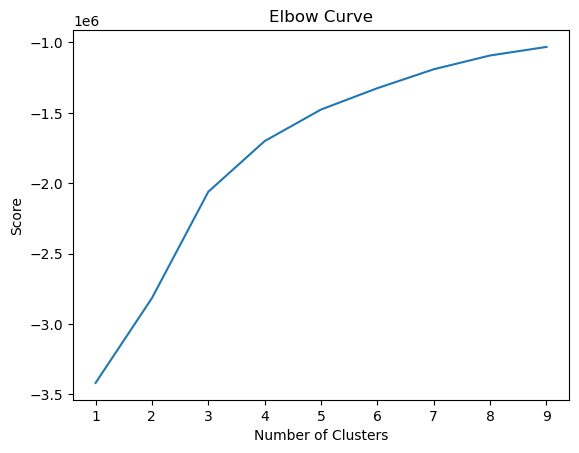

In [14]:
# Plot elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Observations: It appears that the 'elbow point' occurs at 4, so there will be 4 clusters in the k-means algorithm.

# 05. k-means Clustering

In [15]:
# Create k-means object.
kmeans = KMeans(n_clusters = 4)

In [16]:
# Fit the k-means object to the data.
kmeans.fit(df_std)

KMeans(n_clusters=4)

In [17]:
# Create column with values corresponding to cluster in which observation belongs
df_trips_cluster['clusters'] = kmeans.fit_predict(df_std)

C:\Users\jrper\AppData\Local\Temp\ipykernel_8292\182063158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trips_cluster['clusters'] = kmeans.fit_predict(df_std)


In [18]:
# Ensure 'clusters' column was successfully created
df_trips_cluster.head()

,tripduration_minutes,start station latitude,start station longitude,end station latitude,end station longitude,birth year,customer_age,hour_starttime,hour_stoptime,clusters
0,3.766667,40.719586,-74.043117,40.721525,-74.046305,1984,36,0,0,2
1,6.283333,40.719586,-74.043117,40.726012,-74.050389,1989,31,0,0,2
2,4.800000,40.719586,-74.043117,40.726012,-74.050389,1989,31,0,0,2
3,7.250000,40.730897,-74.063913,40.719282,-74.071262,1969,51,0,0,2
4,3.850000,40.719586,-74.043117,40.714584,-74.042817,1983,37,0,0,2


#### Observations: New column successfully created.

In [19]:
# View counts for clusters
df_trips_cluster['clusters'].value_counts()

1    150895
0    134201
2     94763
3         2
Name: clusters, dtype: int64

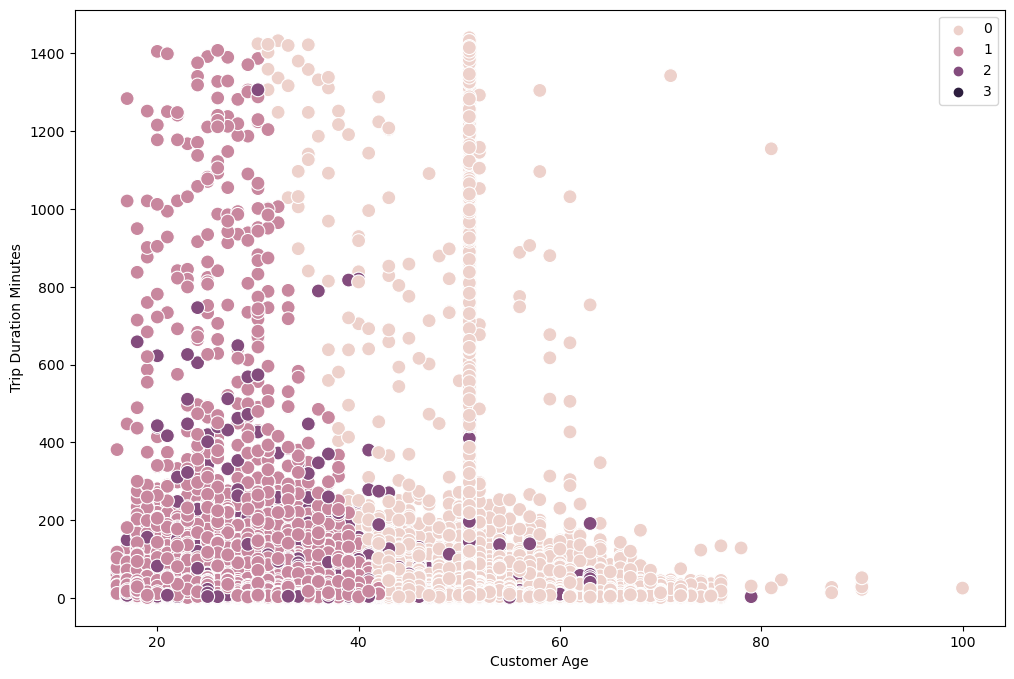

In [20]:
# Plot clusters for 'customer_age' and 'tripduration_minutes' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_trips_cluster['customer_age'], y=df_trips_cluster['tripduration_minutes'], hue=kmeans.labels_, s=100) 
 
ax.grid(False) 
plt.xlabel('Customer Age') 
plt.ylabel('Trip Duration Minutes') 
plt.show()

#### Observations: The '1' cluster represents customers aged approximately 40 and under for all trip durations. The '0' cluster mostly represents customers over age 40 for all trip durations. The '2' cluster represents customers up to age 79 whose trip durations are mostly 800 minutes or less. 

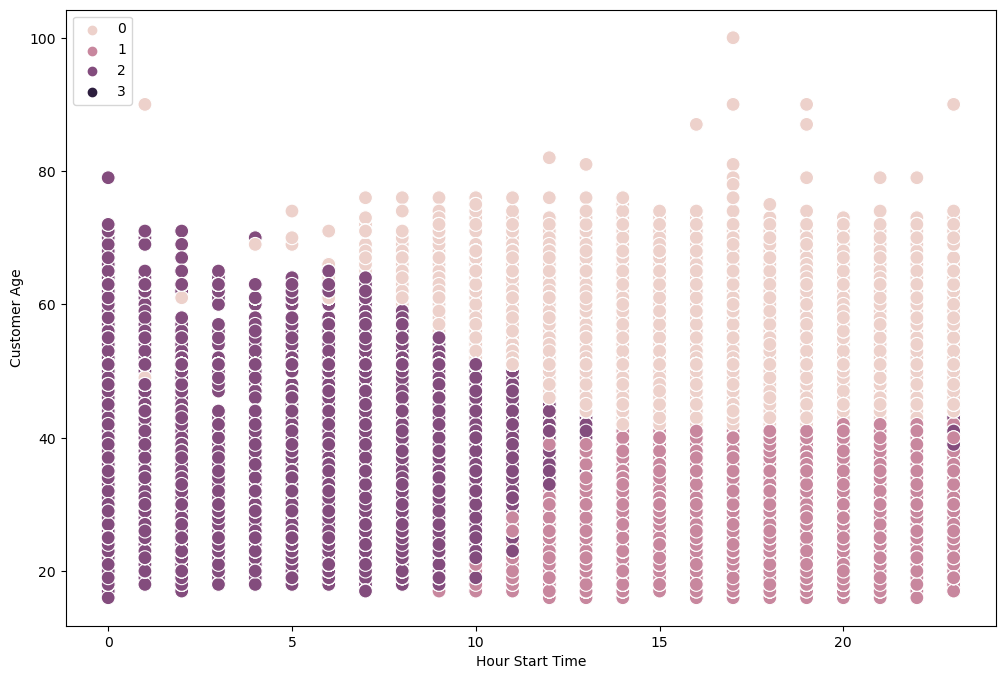

In [21]:
# Plot clusters for 'hour_starttime' and 'customer_age' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_trips_cluster['hour_starttime'], y=df_trips_cluster['customer_age'], hue=kmeans.labels_, s=100) 
 
ax.grid(False) 
plt.xlabel('Hour Start Time') 
plt.ylabel('Customer Age') 
plt.show()

#### Observations: The '1' cluster has the highest number of data points and represents customers approximately age 40 and under that begin their trips at 9:00am or later. The '0' cluster has the next highest number of data points and represents customers over age 40 that begin their trips at 7:00am or later, with a few exceptions that begin earlier. The '2' cluster represents customers of all ages that mostly begin their trips between 12:00am and 12:00pm. The '3' cluster only has 2 data points and isn't visible.

In [22]:
# Create column for cluster color
df_trips_cluster.loc[df_trips_cluster['clusters'] == 3, 'cluster'] = 'dark purple'
df_trips_cluster.loc[df_trips_cluster['clusters'] == 2, 'cluster'] = 'purple'
df_trips_cluster.loc[df_trips_cluster['clusters'] == 1, 'cluster'] = 'light purple'
df_trips_cluster.loc[df_trips_cluster['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\jrper\AppData\Local\Temp\ipykernel_8292\3700238779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trips_cluster.loc[df_trips_cluster['clusters'] == 3, 'cluster'] = 'dark purple'


In [23]:
# Calculate descriptive statistics for clusters
df_trips_cluster.groupby('cluster').agg({'tripduration_minutes':['mean', 'median'], 
                         'customer_age':['mean', 'median'], 
                         'hour_starttime':['mean', 'median']})

tripduration_minutes            customer_age         \
                             mean     median         mean median   
cluster                                                            
dark purple             10.433333  10.433333    26.000000   26.0   
light purple            20.061008  10.600000    30.796998   31.0   
pink                    25.756216  12.033333    51.752133   51.0   
purple                  13.489345   7.400000    38.483480   37.0   

             hour_starttime         
                       mean median  
cluster                             
dark purple        8.000000    8.0  
light purple      16.919348   17.0  
pink              16.645927   17.0  
purple             7.768169    8.0

#### Observations: 
#### An understanding of customer age combined with start times and/or trip duration could give insight regarding what the bikes are being used for such as students traveling for school, adults traveling for work, or customers taking trips for recreation. 
#### The median times for beginning a trip are 8:00am and 5:00pm, so it could be valuable to combine that information with station popularity to plan for how many bikes should be available and where they are most needed. 